# Assigment 04: Due 10/1

You can use these imports

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit #simpliest scipy fitting method
import scipy.special as sf
%matplotlib notebook

# Problem 1a

Using Monte Carlo techniques discusses in *02_Integration_MC* notebook, solve the following integral and compare it to the exact solution:

$\int_0^2 \frac{2}{(2^2 + x^2)^{3/2}}dx$

In your Monte Carlo integration, use 10,000 random points.

In [81]:
N= 10000
x0=0
x1=2

def f(x):
    return 2/((4+x**2)**(3/2))


In [114]:
xarr= np.linspace(x0,x1,N)
y= f(xarr)


fmax= max(y)
x_rand = x0+ (x1-x0)*np.random.random(N)
y_rand= np.random.random(N)*fmax

below= np.where(y_rand < f(x_rand))
above= np.where(y_rand >= f(x_rand))

r= float(len(below[0])/N)
a= (x1-x0)*fmax
integral= (r*a)

print(integral)
exact= 0.3535533
percent=(np.abs(integral-exact)/ exact)*100
print("Using the MC method, we obtain a percent error of:", percent)

0.35755
Using the MC method, we obtain a percent error of: 1.1304377586066836


# 1b

Make a scatter plot of points below and above the integrand function. This is the some type of graph shown in the *02_Integration_MC* notebook with the blue and green points.

<IPython.core.display.Javascript object>


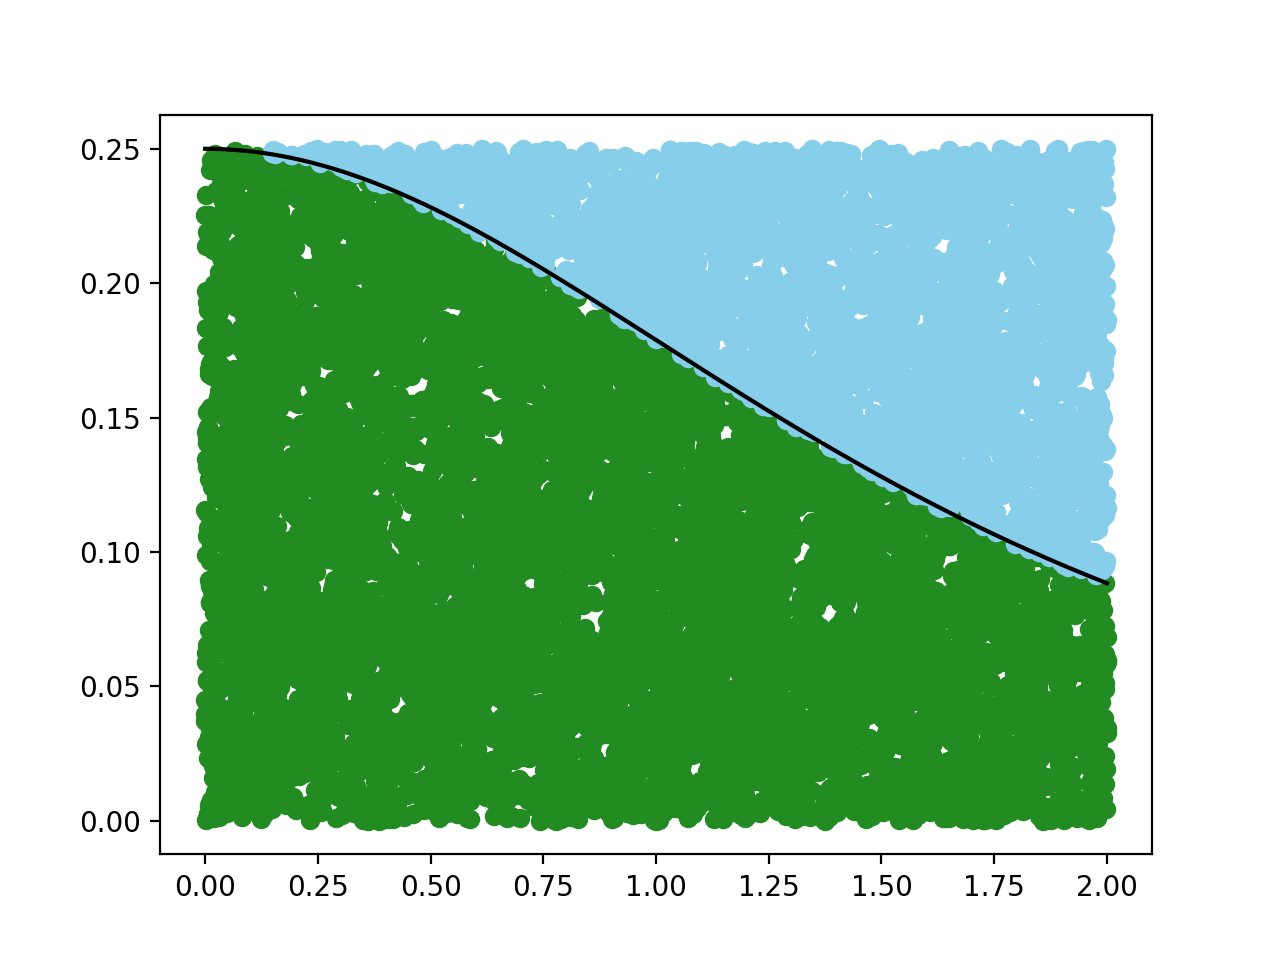

In [83]:
fig=plt.figure()
plt.scatter(x_rand[below], y_rand[below], color = "forestgreen")
plt.scatter(x_rand[above], y_rand[above], color = "skyblue")
plt.plot(x,y, color= "Black");


# Problem 2a
Read in the data set *./data/decay_data.txt*, this lists the time in days, number of particles, and the uncertianty on the particles. This is the same radio active decay data set used in our fitting example *Fitting_Lecture_Notes* from Module 2b.

Plot the data with its error bars.


<IPython.core.display.Javascript object>


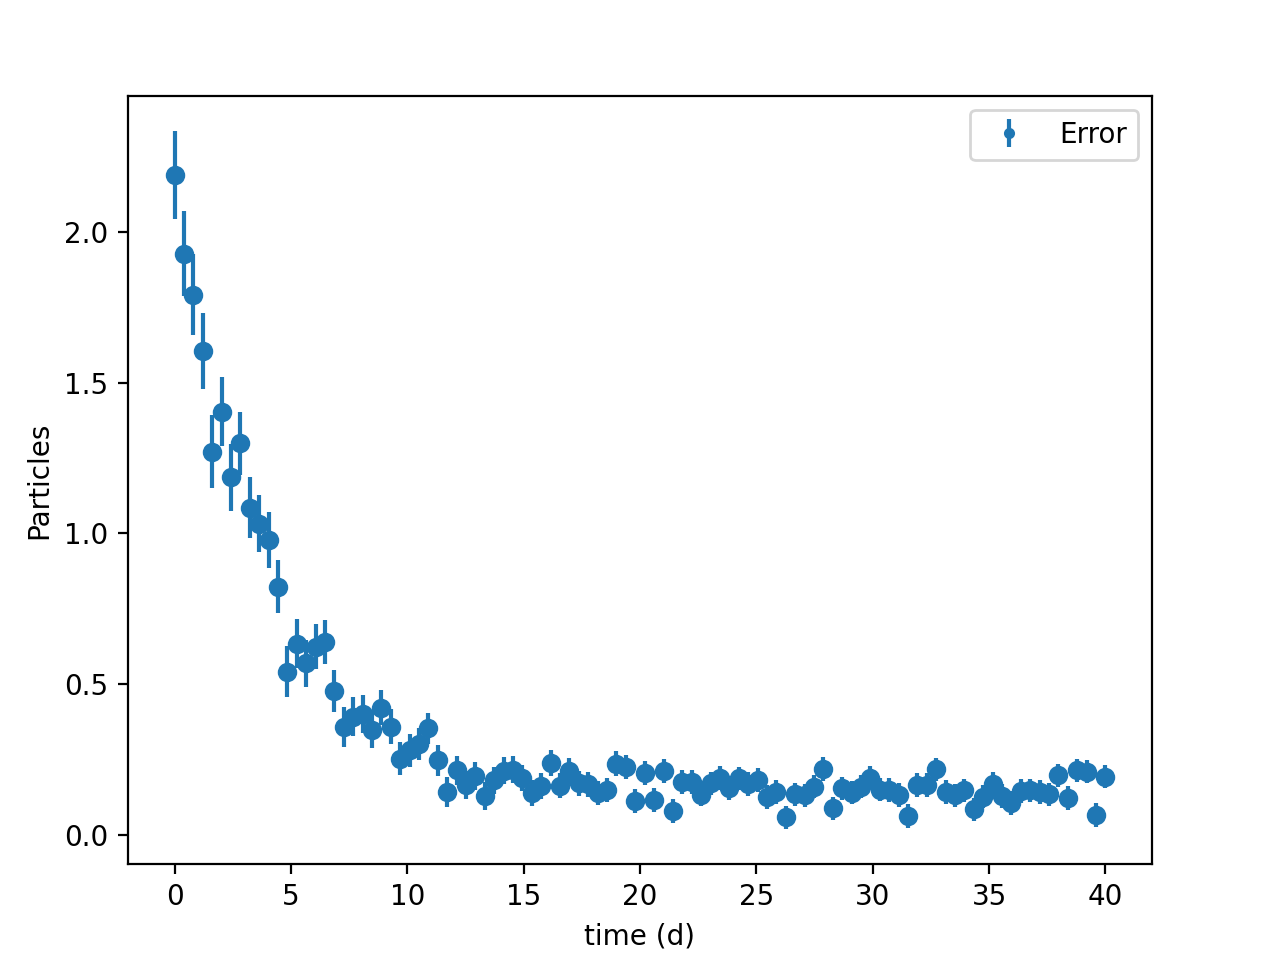

In [84]:
t, Num, N_error = np.loadtxt('decay_data.txt', unpack=True)

fig1 = plt.figure()
axes1 = fig1.add_axes([0.1,0.1,0.8,0.8])
axes1.scatter(t, Num)
axes1.errorbar(t, Num, yerr = N_error, fmt='.', label= "Error")
axes1.set_xlabel('time (d)')
axes1.set_ylabel('Particles')
axes1.legend();

# Problem 2b

Fit the data with 3 fit parameters using MCMC MH algorithm. You should take 10,000 steps and impliment the random test on $\chi ^2$, like we did our *03_MC_Fit* example notebook using the *get_chi_squared* function. For this we will use a function template of: $y = p_0 \cdot e^{-t/p_1} + p_2$,

where $p_0, p_1$, and $p_2$ are the fit parameters. When fitting you should choose starting values of $p_0 = p_1 = p_2 = 1.0$ to avoid nan errors.

In [85]:
N=10000

def func(t,p0,p1,p2):
    return p0*np.exp(-t/p1)+p2



def get_chi_squared(x, y, sigma, params):
    RR= 0.0
    for i in range(len(x)):
        y_prime= func(x[i], params[0], params[1], params[2])
        RR+= ((y[i] - y_prime) / sigma[i]) ** 2 
    return RR 
    
    

In [117]:

init_params = np.array([1.0,1.0,1.0])
p_list=[init_params]
RRs = [get_chi_squared(t, Num, N_error, init_params)]

for i in range (10000):
    test_param = [np.random.normal(p_list[-1][0],0.5),np.random.normal(p_list[-1][1],0.5),np.random.normal(p_list[-1][0],0.5)]
    RR_test = get_chi_squared(t, Num, N_error, test_param)
    test = np.random.random() <= (RRs[-1])/(RR_test)
    if test:
        p_list.append(test_param)
        RRs.append(RR_test)
    else:
        p_list.append(p_list[-1])
        RRs.append(RRs[-1])    
            
RR_min = np.amin(RRs)
best_i = RRs.index(RR_min)
best_params = p_list[best_i]
print("best p0:", best_params[0])
print("best p1:",  best_params[1])
print("best p2:", best_params[2])
print("Chi Sqaured:", RR_min)
    

<ipython-input-85-3a84e92bb5ab>:12: RuntimeWarning: overflow encountered in double_scalars
  RR+= ((y[i] - y_prime) / sigma[i]) ** 2
<ipython-input-85-3a84e92bb5ab>:4: RuntimeWarning: overflow encountered in exp
  return p0*np.exp(-t/p1)+p2
<ipython-input-85-3a84e92bb5ab>:4: RuntimeWarning: overflow encountered in double_scalars
  return p0*np.exp(-t/p1)+p2


best p0: 1.4250592012483727
best p1: 5.029294410219289
best p2: 0.13862101384729875
Chi Sqaured: 187.26153031052615


# Problem 2c

What is the reduced $\chi^2$ of your fit and the p-value?
Is this a good fit?

In [123]:
dof= len(t)- len(best_params)-1

pvalue= sf.gammaincc(dof/2.0, RR_min/2.0)

print('reduced Chi Sqaured:', (RR_min/dof))
print('p-value', pvalue)

print("This is a good fit")


reduced Chi Sqaured: 1.9506409407346474
p-value 7.495857219900175e-08
This is a good fit


# Problem 2d

Plot on the same graph your data and the line showin the fitted function.

<IPython.core.display.Javascript object>


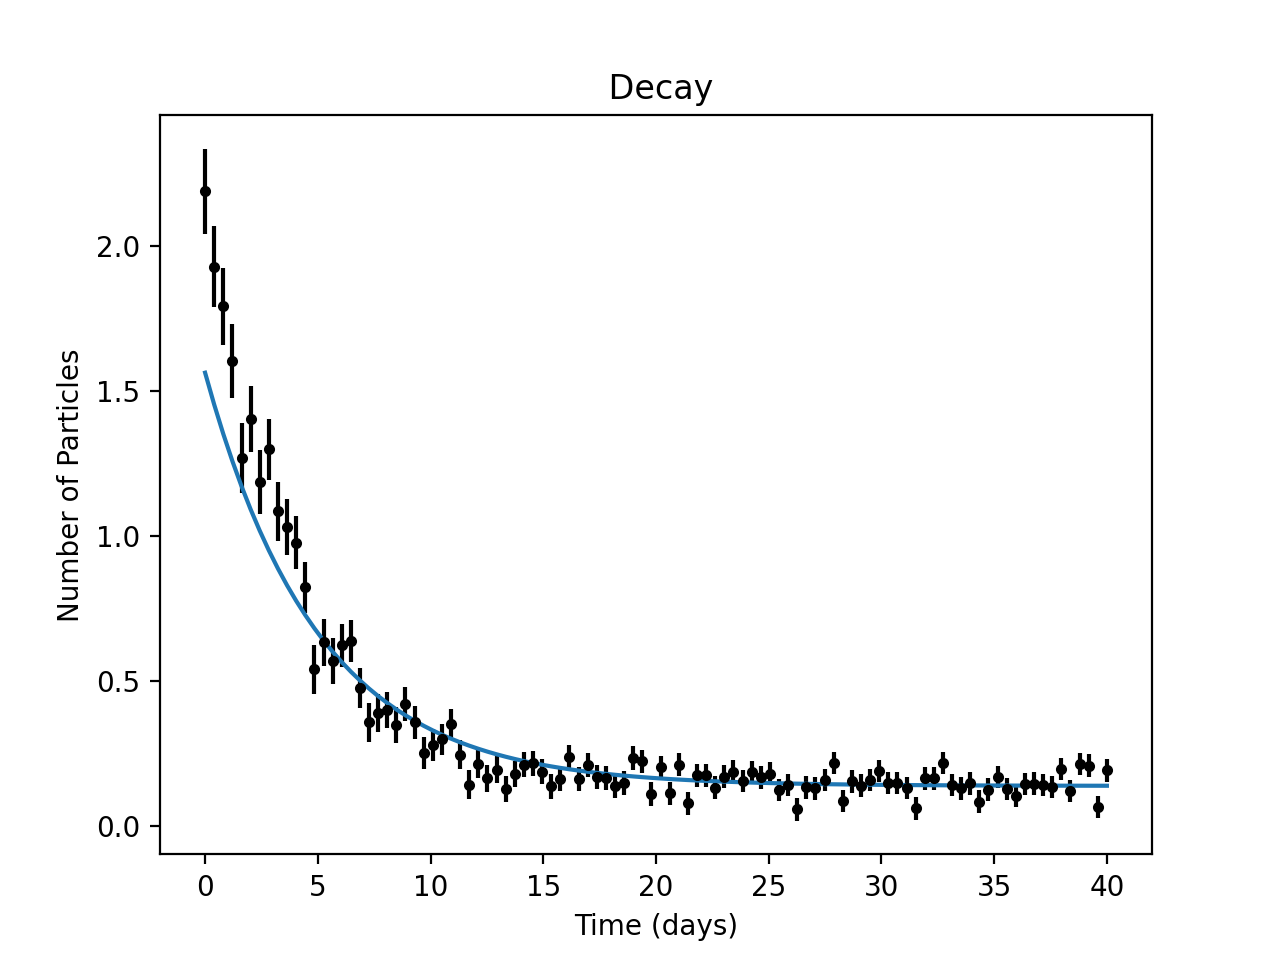

In [119]:
plt.figure()
plt.errorbar(t,Num,yerr=N_error, fmt='.k')
plt.plot(t,func(t,*best_params))
plt.title(' Decay')
plt.xlabel('Time (days)')
plt.ylabel('Number of Particles');

# Problem 2e

Plot the histogram distributions of the three fit parameters.

<IPython.core.display.Javascript object>


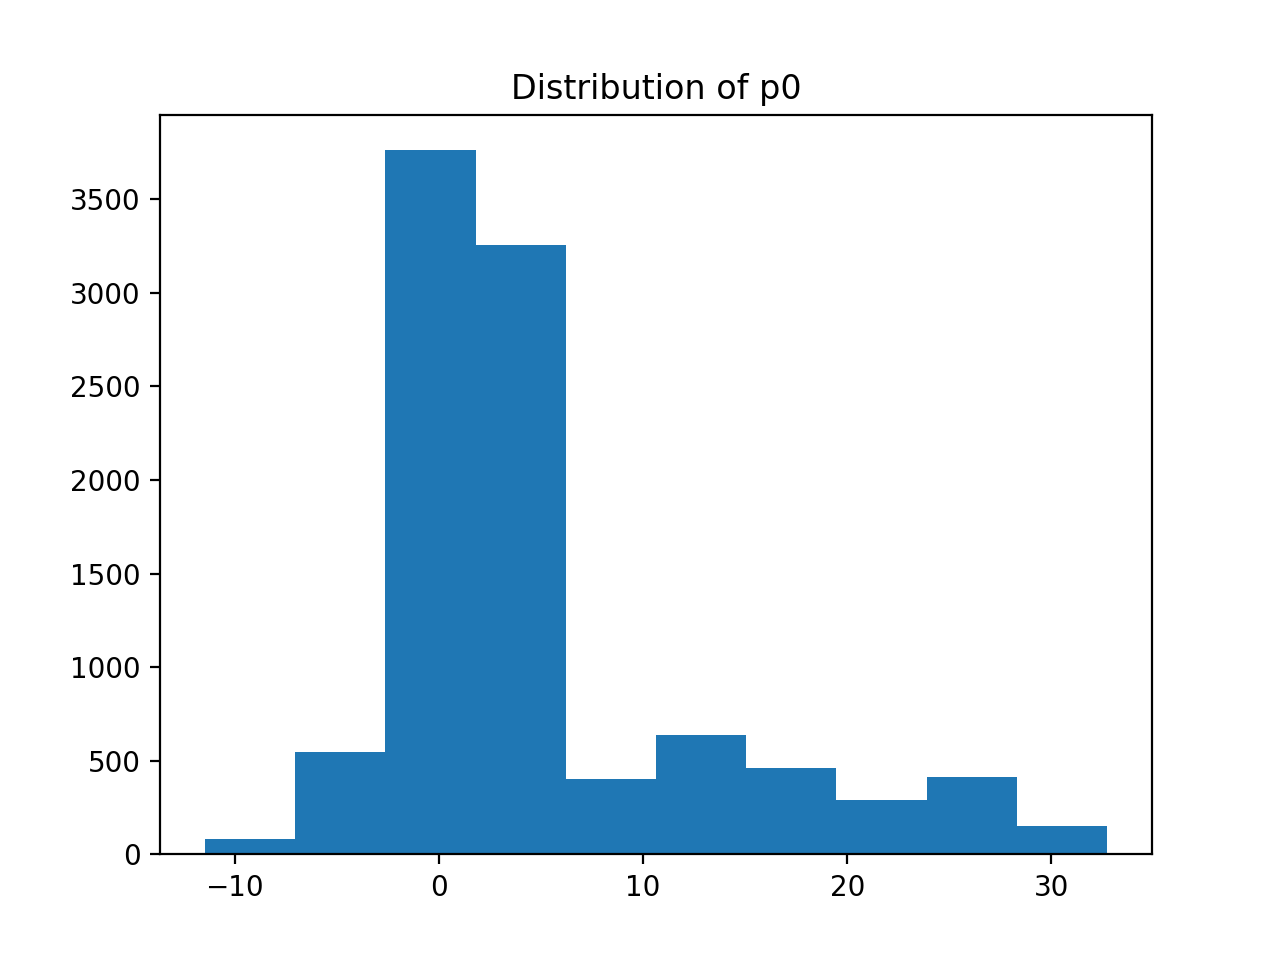

Text(0.5, 1.0, 'Distribution of p0')

In [120]:
plt.figure()
plt.hist([i[0] for i in p_list])
plt.title('Distribution of p0')


<IPython.core.display.Javascript object>


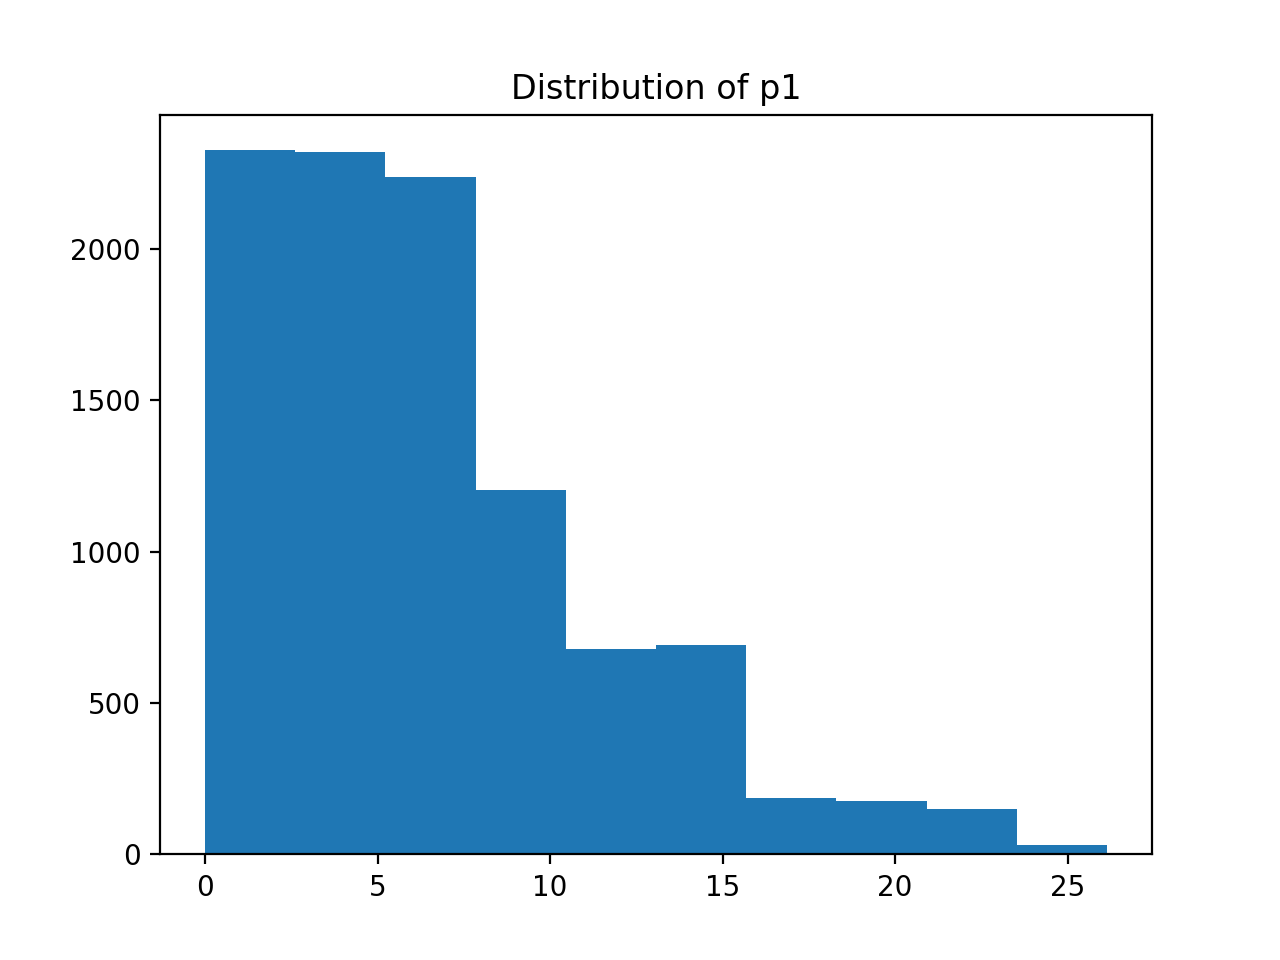

Text(0.5, 1.0, 'Distribution of p1')

In [121]:
plt.figure()
plt.hist([i[1] for i in p_list])
plt.title('Distribution of p1')


<IPython.core.display.Javascript object>


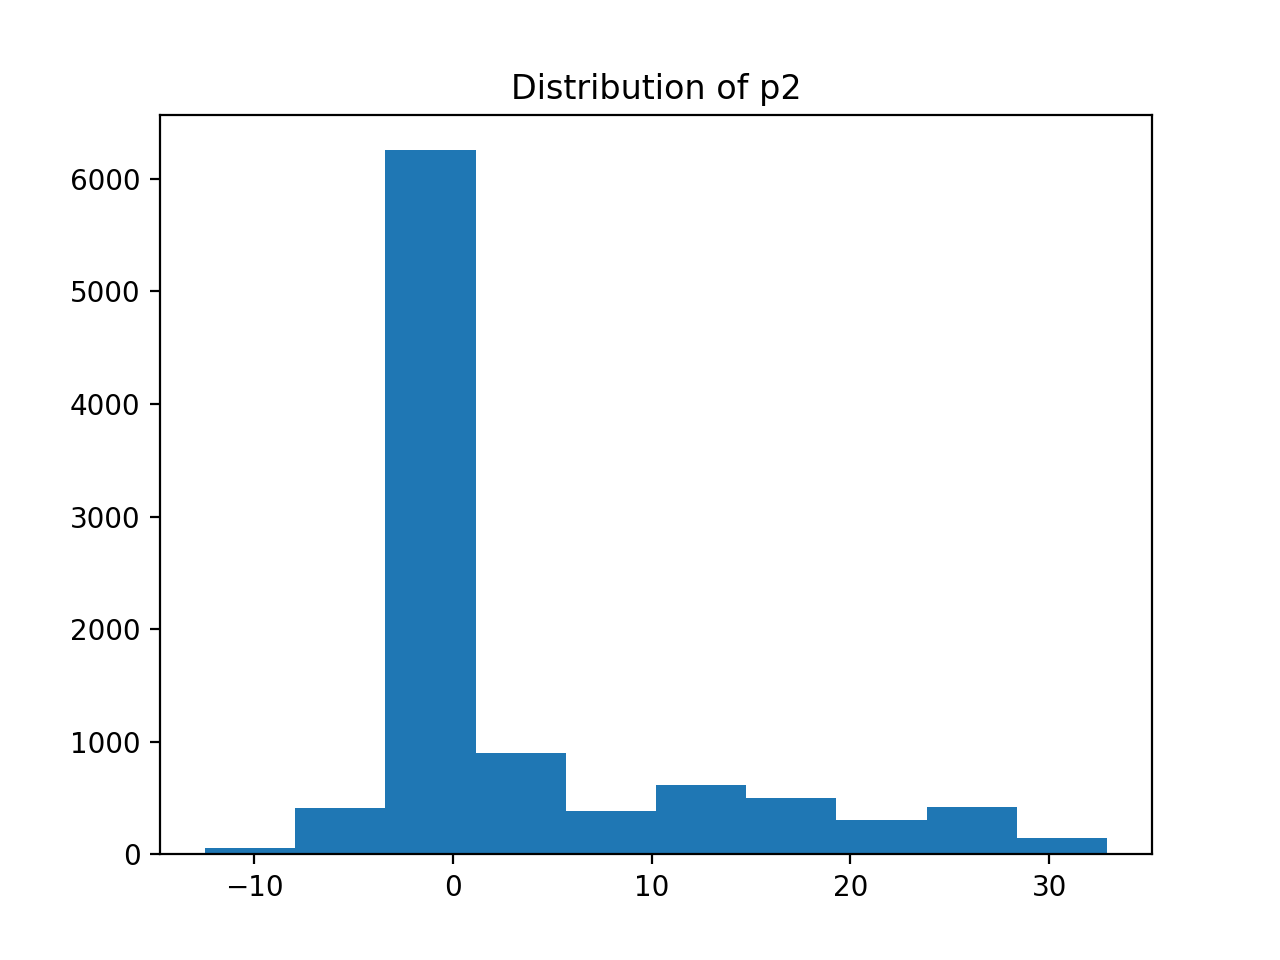

In [122]:
plt.figure()
plt.hist([i[2] for i in p_list])
plt.title('Distribution of p2');